# DEX on zkSync Era - dataset parser

- Krzysztof Gogol
- email: [gogol@ifi.uzh.ch](mailto:gogol@ifi.uzh.ch)
- Website: https://gogol.substack.com/

In [1]:
import gzip
import pickle
import os
from tqdm.notebook import tqdm
import pandas as pd
#from web3 import Web3
import web3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime

from  functions_parser import process_swap_data, process_sync_data
from  functions_MAV import calculate_metrics

#CONST_BTC = 1e8
#CONST_ETH = 1e18
#CONST_USDC = 1e6

fee = 8


/Users/kris/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
CONST_Token0 = 1e6 #USDC
CONST_Token1 = 1e18 #ETH

token0 = 'USDC'
token1 = 'ETH'

exchange_name = 'zkSwap'

file_swap_data = 'zkSwap-Uniswap-V2-ETH-USDC_Swap_fees.csv.gz'
file_sync_data = 'zkSwap-Uniswap-V2-ETH-USDC_Sync.csv.gz'

file_market_data = './MarketData/df1h_usdc_eth.pickle'
frequency = 'H'

file_market_data = './MarketData/df1m_usdc_eth.pickle'
frequency = 'T'

In [3]:
CONST_Token0 = 1e6 #USDC
CONST_Token1 = 1e18 #ETH

token0 = 'USDC'
token1 = 'ETH'

exchange_name = 'SyncSwap'

file_swap_data = 'SyncSwap-USDC-ETH_Swap_fees.csv.gz'
file_sync_data = 'SyncSwap-USDC-ETH_Sync.csv.gz'

file_market_data = './MarketData/df1h_usdc_eth.pickle'
frequency = 'H'

file_market_data = './MarketData/df1m_usdc_eth.pickle'
frequency = 'T'

In [4]:
CONST_Token0 = 1e18 #ETH
CONST_Token1 = 1e8 #BTC

token0 = 'ETH'
token1 = 'BTC'

exchange_name = 'zkSwap'

file_swap_data = 'zkSwap-Uniswap-V2-WBTC-ETH_Swap_fees.csv.gz'
file_sync_data = 'zkSwap-Uniswap-V2-WBTC-ETH_Sync.csv.gz'

file_market_data = './MarketData/df1h_eth_btc.pickle'
frequency = 'H'
frequency = 'T'

In [5]:
CONST_Token0 = 1e18 #ETH
CONST_Token1 = 1e8 #BTC

token0 = 'ETH'
token1 = 'BTC'

exchange_name = 'SyncSwap'

file_swap_data = 'SyncSwap-V2-ETH-WBTC_Swap_fees.csv.gz'
file_sync_data = 'SyncSwap-V2-ETH-WBTC_Sync.csv.gz'

file_market_data = './MarketData/df1h_eth_btc.pickle'
frequency = 'H'
frequency = 'T'

In [6]:
CONST_Token0 = 1e6 #USDC
CONST_Token1 = 1e18 #ETH

token0 = 'USDC'
token1 = 'ETH'

exchange_name = 'SyncSwap'

file_swap_data = 'SyncSwap-USDC-ETH_Swap_fees.csv.gz'
file_sync_data = 'SyncSwap-USDC-ETH_Sync.csv.gz'

file_market_data = './MarketData/df1h_usdc_eth.pickle'
frequency = 'H'

file_market_data = './MarketData/df1m_usdc_eth.pickle'
frequency = 'T'

In [7]:
path_dir = './data/'
os.makedirs(path_dir, exist_ok=True)

export_dir = './export/'
os.makedirs(export_dir, exist_ok=True)

In [8]:
#Loading data from swap method
swap_df = pd.read_csv(path_dir+'/'+file_swap_data, sep=',', compression='gzip')

process_swap_data(swap_df, CONST_Token0, CONST_Token1)

columns_to_drop = ['price_buy_token0', 'price_buy_token1', 'address', 'topics_0', 'topics_1', 'topics_2', 'topics_3',  'data', 'event_name', 'status', 'Unnamed: 0.1', 'Unnamed: 0']
swap_df.drop(columns=columns_to_drop, inplace=True)

swap_df['timestamp'] = pd.to_datetime(swap_df['timestamp'])
swap_df = swap_df[swap_df['timestamp'] >= pd.Timestamp(2023, 7, 1)]

swap_df.head()


,transactionHash,blockNumber,transactionIndex,logIndex,timestamp,gasUsed,effectiveGasPrice,fees,amount0In,amount1In,amount0Out,amount1Out,effective_price
3,0x000001d446b3b84e0f88600e567c8e1dc53f61ec95a6...,12925913,5,31,2023-09-03 19:02:03,414833,250000000,0.000104,0.000000,0.062898,102.659903,0.000000,1632.165860
4,0x0000022e0b6687178061b18a81880da863f8bec729b9...,13632078,3,16,2023-09-12 03:35:05,463557,250000000,0.000116,0.000000,0.000072,0.114170,0.000000,1582.617133
6,0x000003c3df29596ed35b103a8d0666bb8afc62a22bfe...,7469199,6,49,2023-07-01 10:28:24,550271,250000000,0.000138,153.761296,0.000000,0.000000,0.079983,1922.425150
8,0x000005d05abc90a2fe04c653c9babdd2cfc675312c6b...,7558192,6,35,2023-07-02 11:29:56,442671,250000000,0.000111,0.000000,0.080683,153.924459,0.000000,1907.760837
13,0x000010c8a753336d40ca311f0dbc77b33e6de16ed4e8...,13493487,14,110,2023-09-10 12:06:47,373297,250000000,0.000093,0.000000,0.000078,0.125829,0.000000,1617.547243


In [9]:
#Loading data from sync method
sync_df = pd.read_csv(path_dir+'/'+file_sync_data, sep=',', compression='gzip')
sync_df=process_sync_data(sync_df, CONST_Token0, CONST_Token1)

columns_to_drop = ['address', 'topics_0', 'topics_1', 'topics_2', 'topics_3',  'data', 'event_name', 'Unnamed: 0']
sync_df.drop(columns=columns_to_drop, inplace=True)

sync_df.head()


,blockNumber,transactionHash,transactionIndex,logIndex,timestamp,reserve_0,reserve_1,spot_price
0,13106,0x7bc13feafc02db763e5db405de99d69364b0979763af...,7,36,2023-03-24 14:23:49,5.000000,0.00280,1785.714286
1,13463,0xe796d825e6a33a55483d273b101cd567c6e57caf39b5...,0,6,2023-03-24 14:31:39,3.686151,0.00380,970.039737
2,13849,0xe0590193ade2eaaedb063e270e62afbdb5bcd54eb0a3...,0,6,2023-03-24 14:39:58,3.591819,0.00390,920.979231
3,13859,0x070a3c311dab420e0bb41ebee9c360ee49f8dcae7fc4...,2,12,2023-03-24 14:40:09,3.502199,0.00400,875.549750
4,13911,0xa23d767e5959ae44441eef7d979743b38e7b1154937c...,0,9,2023-03-24 14:41:08,3.686151,0.00421,875.549750


In [10]:
#join swap_df and sync_df
swap_df = swap_df.merge(sync_df[['transactionHash','reserve_0', 'reserve_1', 'spot_price']], on='transactionHash', how='left')
swap_df.head()


,transactionHash,blockNumber,transactionIndex,logIndex,timestamp,gasUsed,effectiveGasPrice,fees,amount0In,amount1In,amount0Out,amount1Out,effective_price,reserve_0,reserve_1,spot_price
0,0x000001d446b3b84e0f88600e567c8e1dc53f61ec95a6...,12925913,5,31,2023-09-03 19:02:03,414833,250000000,0.000104,0.000000,0.062898,102.659903,0.000000,1632.165860,1.729764e+07,10566.237286,1637.067352
1,0x0000022e0b6687178061b18a81880da863f8bec729b9...,13632078,3,16,2023-09-12 03:35:05,463557,250000000,0.000116,0.000000,0.000072,0.114170,0.000000,1582.617133,1.903878e+07,11993.807532,1587.384189
2,0x000003c3df29596ed35b103a8d0666bb8afc62a22bfe...,7469199,6,49,2023-07-01 10:28:24,550271,250000000,0.000138,153.761296,0.000000,0.000000,0.079983,1922.425150,2.900690e+07,15134.023917,1916.668035
3,0x000005d05abc90a2fe04c653c9babdd2cfc675312c6b...,7558192,6,35,2023-07-02 11:29:56,442671,250000000,0.000111,0.000000,0.080683,153.924459,0.000000,1907.760837,2.934002e+07,15333.240109,1913.491275
4,0x000010c8a753336d40ca311f0dbc77b33e6de16ed4e8...,13493487,14,110,2023-09-10 12:06:47,373297,250000000,0.000093,0.000000,0.000078,0.125829,0.000000,1617.547243,1.943701e+07,11980.224350,1622.424958


In [11]:
del sync_df

In [12]:

prices_df = pd.read_pickle(file_market_data)

prices_df_columns_to_drop = ['symbol', 'base', 'market_venue', 'open', 'high',  'low', 'volume', 'trades', 'vwap']
columns_to_drop = [col for col in prices_df_columns_to_drop if col in prices_df.columns]
prices_df.drop(columns=columns_to_drop, inplace=True)

prices_df.rename(columns={'close': 'CEX_price'}, inplace=True)

prices_df.head()

,timestamp,CEX_price
0,2023-06-01 00:00:00,1875.24
1,2023-06-01 00:04:00,1875.67
2,2023-06-01 00:05:00,1876.68
3,2023-06-01 00:06:00,1873.88
4,2023-06-01 00:07:00,1874.63


In [13]:
# Merging swap data with market prices

swap_df['date_hour'] = swap_df['timestamp'].dt.floor(frequency)

prices_df['date_hour'] = pd.to_datetime(prices_df['timestamp']).dt.floor(frequency)

# Merge based on date and hour
swap_df = pd.merge(swap_df, prices_df[['date_hour', 'CEX_price']],
                   on='date_hour',
                     how='left')

del prices_df

swap_df.head()

,transactionHash,blockNumber,transactionIndex,logIndex,timestamp,gasUsed,effectiveGasPrice,fees,amount0In,amount1In,amount0Out,amount1Out,effective_price,reserve_0,reserve_1,spot_price,date_hour,CEX_price
0,0x000001d446b3b84e0f88600e567c8e1dc53f61ec95a6...,12925913,5,31,2023-09-03 19:02:03,414833,250000000,0.000104,0.000000,0.062898,102.659903,0.000000,1632.165860,1.729764e+07,10566.237286,1637.067352,2023-09-03 19:02:00,NaN
1,0x0000022e0b6687178061b18a81880da863f8bec729b9...,13632078,3,16,2023-09-12 03:35:05,463557,250000000,0.000116,0.000000,0.000072,0.114170,0.000000,1582.617133,1.903878e+07,11993.807532,1587.384189,2023-09-12 03:35:00,NaN
2,0x000003c3df29596ed35b103a8d0666bb8afc62a22bfe...,7469199,6,49,2023-07-01 10:28:24,550271,250000000,0.000138,153.761296,0.000000,0.000000,0.079983,1922.425150,2.900690e+07,15134.023917,1916.668035,2023-07-01 10:28:00,NaN
3,0x000005d05abc90a2fe04c653c9babdd2cfc675312c6b...,7558192,6,35,2023-07-02 11:29:56,442671,250000000,0.000111,0.000000,0.080683,153.924459,0.000000,1907.760837,2.934002e+07,15333.240109,1913.491275,2023-07-02 11:29:00,NaN
4,0x000010c8a753336d40ca311f0dbc77b33e6de16ed4e8...,13493487,14,110,2023-09-10 12:06:47,373297,250000000,0.000093,0.000000,0.000078,0.125829,0.000000,1617.547243,1.943701e+07,11980.224350,1622.424958,2023-09-10 12:06:00,NaN


In [14]:
# Calculationg LPFees

#def getAnnualReturn(dailyReturn):
#    return ((dailyReturn + 1)**365 - 1) * 100

swap_df['price_diff'] = (abs(swap_df['spot_price'] - swap_df['CEX_price']))/swap_df['CEX_price']
swap_df['r_price_diff'] = (swap_df['spot_price'] - swap_df['CEX_price'])/swap_df['CEX_price']
swap_df['volume_total_0']  =  swap_df['amount0In'] + swap_df['amount0Out']
swap_df['balance_total_0']  =  swap_df['amount0In'] - swap_df['amount0Out']

swap_df['LP_Fee_0'] = swap_df['volume_total_0'] * fee / 10000
swap_df['LP_Fee_total_0']  = swap_df['LP_Fee_0']
swap_df['LP_fee_p'] = swap_df['LP_Fee_0'] / swap_df['volume_total_0']

#swap_df['price_impact_p'] = (swap_df['effective_price']  - swap_df['spot_price']) / swap_df['effective_price']
#swap_df['price_impact_0'] = swap_df['price_impact_p'] * swap_df['volume_total_0']

#swap_df['block_slippage_0'] = 1
#swap_df['block_slippage_p'] = 1

#swap_df['annual_return'] = swap_df['LP_Fee_0'] / swap_df['reserve_0']
#swap_df['annual_return'] = getAnnualReturn(swap_df['annual_return'])

In [15]:
# Converting gas fees

if (token0 == 'ETH') :
    swap_df.rename(columns={'fees': 'fees_0'}, inplace=True)

if token1 == 'ETH':
    # Update fees column based on conditions without iterating
    swap_df['fees'] = swap_df['fees'].where(pd.notna(swap_df['CEX_price']), swap_df['spot_price'] * swap_df['fees'])
    swap_df['fees'] = swap_df['fees'].where(pd.isna(swap_df['CEX_price']), swap_df['CEX_price'] * swap_df['fees'])
    
    # Rename the 'fees' column to 'fees_0'
    swap_df.rename(columns={'fees': 'fees_0'}, inplace=True)

swap_df['fees_p'] = swap_df['fees_0'] / swap_df['volume_total_0']

swap_df.head()

,transactionHash,blockNumber,transactionIndex,logIndex,timestamp,gasUsed,effectiveGasPrice,fees_0,amount0In,amount1In,...,date_hour,CEX_price,price_diff,r_price_diff,volume_total_0,balance_total_0,LP_Fee_0,LP_Fee_total_0,LP_fee_p,fees_p
0,0x000001d446b3b84e0f88600e567c8e1dc53f61ec95a6...,12925913,5,31,2023-09-03 19:02:03,414833,250000000,0.169777,0.000000,0.062898,...,2023-09-03 19:02:00,NaN,NaN,NaN,102.659903,-102.659903,0.082128,0.082128,0.0008,0.001654
1,0x0000022e0b6687178061b18a81880da863f8bec729b9...,13632078,3,16,2023-09-12 03:35:05,463557,250000000,0.183961,0.000000,0.000072,...,2023-09-12 03:35:00,NaN,NaN,NaN,0.114170,-0.114170,0.000091,0.000091,0.0008,1.611288
2,0x000003c3df29596ed35b103a8d0666bb8afc62a22bfe...,7469199,6,49,2023-07-01 10:28:24,550271,250000000,0.263672,153.761296,0.000000,...,2023-07-01 10:28:00,NaN,NaN,NaN,153.761296,153.761296,0.123009,0.123009,0.0008,0.001715
3,0x000005d05abc90a2fe04c653c9babdd2cfc675312c6b...,7558192,6,35,2023-07-02 11:29:56,442671,250000000,0.211762,0.000000,0.080683,...,2023-07-02 11:29:00,NaN,NaN,NaN,153.924459,-153.924459,0.123140,0.123140,0.0008,0.001376
4,0x000010c8a753336d40ca311f0dbc77b33e6de16ed4e8...,13493487,14,110,2023-09-10 12:06:47,373297,250000000,0.151412,0.000000,0.000078,...,2023-09-10 12:06:00,NaN,NaN,NaN,0.125829,-0.125829,0.000101,0.000101,0.0008,1.203312


In [16]:
#volume can be positive or negative, -> then implied slippage (the imbalance) -> descirbe more in the discussion part of the paper
    #also total sum withing a block

# Group by blockNumber and sort by transactionIndex within each group
swap_df.sort_values(by=['blockNumber', 'transactionIndex'], inplace=True)

# Calculationg BlockSlippage
swap_df['block_slippage_0'] = np.full(len(swap_df), 0)

# Calculate block slippage within each block using vectorized operations
swap_df['block_slippage_0'] = swap_df.groupby('blockNumber')['balance_total_0'].cumsum()

# Subtract balance_total_0 from block_slippage_0 directly
swap_df['block_slippage_0'] -= swap_df['balance_total_0']

#swap_df.head()

In [17]:
#swap_df[swap_df['block_slippage_0'] > 100]
swap_df[swap_df['blockNumber'] == 9805213]



,transactionHash,blockNumber,transactionIndex,logIndex,timestamp,gasUsed,effectiveGasPrice,fees_0,amount0In,amount1In,...,CEX_price,price_diff,r_price_diff,volume_total_0,balance_total_0,LP_Fee_0,LP_Fee_total_0,LP_fee_p,fees_p,block_slippage_0
434855,0x12c78e51e635507feef938b41a709dec0b589a51ab4e...,9805213,1,6,2023-07-28 23:30:55,414271,250000000,0.194701,0.0,0.000018,...,NaN,NaN,NaN,0.033381,-0.033381,0.000027,0.000027,0.0008,5.832693,0.0


In [18]:
swap_df.to_csv(export_dir + f'swaps_{token0}_{token1}_{exchange_name}.csv')

In [19]:
# Finding max price diff per minute or hour

swap_df['block_slippage_total_0'] = swap_df['block_slippage_0']
swap_df['block_slippage_avg_1m_0'] = swap_df['block_slippage_0']
swap_df['volume_avg_1m_0'] = swap_df['volume_total_0']
swap_df['fees_avg_1m_0'] = swap_df['fees_0']
swap_df['fees_total_0'] = swap_df['fees_0']
swap_df['swap_count_1m'] = np.full(len(swap_df), 1)

#agg_dic = dict(volume_total_0='sum', price_diff='max')
agg_dic = dict(volume_total_0='sum', LP_Fee_total_0 = 'sum', block_slippage_total_0 = 'sum', price_diff='last', volume_avg_1m_0='mean', fees_avg_1m_0='mean', fees_total_0 = 'sum', block_slippage_avg_1m_0='mean', swap_count_1m = 'count')


swap_df.set_index('timestamp', inplace=True)
df_per_freq = swap_df.resample(frequency).agg(agg_dic).dropna(subset=['price_diff'])

# Reset index to make 'timestamp' a column again
df_per_freq.reset_index(inplace=True)

# Merge based on 'price_diff' and keep 'timestamp' as index
df_per_freq = pd.merge(df_per_freq, swap_df[['price_diff', 'reserve_0', 'reserve_1', 'spot_price', 'CEX_price', 'fees_0', 'LP_Fee_0', 'block_slippage_0', 'transactionHash']],    
                       how='left', left_on='price_diff', right_on='price_diff')

# Set 'timestamp' as index
df_per_freq.set_index('timestamp', inplace=True)


df_per_freq.head()


,volume_total_0,LP_Fee_total_0,block_slippage_total_0,price_diff,volume_avg_1m_0,fees_avg_1m_0,fees_total_0,block_slippage_avg_1m_0,swap_count_1m,reserve_0,reserve_1,spot_price,CEX_price,fees_0,LP_Fee_0,block_slippage_0,transactionHash
timestamp,,,,,,,,,,,,,,,,,
2023-07-01 00:07:00,4497.988040,3.598390,174.213884,0.004178,204.454002,0.206483,4.542633,7.918813,22,2.903758e+07,15037.359822,1931.028978,1939.13,0.189071,0.021097,0.000000,0xdd291d7c18826a4f6db01e0759c683c826f713a0e13d...
2023-07-01 00:10:00,4088.250413,3.270600,-20.613542,0.004240,151.416682,0.237910,6.423564,-0.763465,27,2.903987e+07,15039.491469,1930.907805,1939.13,0.506861,0.047011,0.000000,0x9972087952fa90131377e32216763bf75a21e5eb8890...
2023-07-01 00:11:00,5729.658562,4.583727,-88.287348,0.004521,184.827696,0.222379,6.893738,-2.847979,31,2.903524e+07,15041.252550,1930.373502,1939.14,0.222904,0.415717,0.000000,0x8ec53017652ae4e2e30c46e8d4a42850a4031574b08d...
2023-07-01 00:25:00,4001.173191,3.200939,1614.288565,0.005744,121.247672,0.229112,7.560694,48.917835,33,2.902163e+07,15052.785150,1927.990746,1939.13,0.246983,0.015685,0.000000,0x9682d5803f07c5ece249d14b179a1db715be4768f22f...
2023-07-01 00:28:00,15689.728449,12.551783,10709.786389,0.004589,475.446317,0.229468,7.572435,324.538981,33,2.903656e+07,15042.978437,1930.240376,1939.14,0.223189,0.003079,-873.726743,0x967cbd475bd0b4dfac2a726722c3114d20693ad27ba2...


In [20]:
#calulating MAV_0, V_max_0, reserve_total_0, LP_fee_0

df_per_freq = calculate_metrics(df_per_freq)
df_per_freq['LP_fee_MAV_0'] = df_per_freq['V_max_0'] * fee / 10000
df_per_freq.head()


,volume_total_0,LP_Fee_total_0,block_slippage_total_0,price_diff,volume_avg_1m_0,fees_avg_1m_0,fees_total_0,block_slippage_avg_1m_0,swap_count_1m,reserve_0,...,CEX_price,fees_0,LP_Fee_0,block_slippage_0,transactionHash,MAV_0,V_max_1,V_max_0,reserve_total_0,LP_fee_MAV_0
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:07:00,4497.988040,3.598390,174.213884,0.004178,204.454002,0.206483,4.542633,7.918813,22,2.903758e+07,...,1939.13,0.189071,0.021097,0.000000,0xdd291d7c18826a4f6db01e0759c683c826f713a0e13d...,127.762201,31.542244,60908.988147,5.807516e+07,48.727191
2023-07-01 00:10:00,4088.250413,3.270600,-20.613542,0.004240,151.416682,0.237910,6.423564,-0.763465,27,2.903987e+07,...,1939.13,0.506861,0.047011,0.000000,0x9972087952fa90131377e32216763bf75a21e5eb8890...,131.639795,32.020596,61828.817883,5.807974e+07,49.463054
2023-07-01 00:11:00,5729.658562,4.583727,-88.287348,0.004521,184.827696,0.222379,6.893738,-2.847979,31,2.903524e+07,...,1939.14,0.222904,0.415717,0.000000,0x8ec53017652ae4e2e30c46e8d4a42850a4031574b08d...,149.704517,34.153780,65929.552447,5.807047e+07,52.743642
2023-07-01 00:25:00,4001.173191,3.200939,1614.288565,0.005744,121.247672,0.229112,7.560694,48.917835,33,2.902163e+07,...,1939.13,0.246983,0.015685,0.000000,0x9682d5803f07c5ece249d14b179a1db715be4768f22f...,242.194417,43.484855,83838.397443,5.804326e+07,67.070718
2023-07-01 00:28:00,15689.728449,12.551783,10709.786389,0.004589,475.446317,0.229468,7.572435,324.538981,33,2.903656e+07,...,1939.14,0.223189,0.003079,-873.726743,0x967cbd475bd0b4dfac2a726722c3114d20693ad27ba2...,154.314158,34.678804,66938.426848,5.807313e+07,53.550741


In [21]:
#calculate threshold for max MAV as  Q3 + 1.5 IQR

data = df_per_freq['price_diff'].dropna()

# Calculate Q1 (25th percentile)
Q1 = np.percentile(data, 25)

# Calculate Q3 (75th percentile)
Q3 = np.percentile(data, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

threshold = Q3 #+ 1.5 * IQR
print("threshold:", threshold)


del(data)

threshold: 0.003193655993413677


In [22]:
df_per_freq.columns

Index(['volume_total_0', 'LP_Fee_total_0', 'block_slippage_total_0',
       'price_diff', 'volume_avg_1m_0', 'fees_avg_1m_0', 'fees_total_0',
       'block_slippage_avg_1m_0', 'swap_count_1m', 'reserve_0', 'reserve_1',
       'spot_price', 'CEX_price', 'fees_0', 'LP_Fee_0', 'block_slippage_0',
       'transactionHash', 'MAV_0', 'V_max_1', 'V_max_0', 'reserve_total_0',
       'LP_fee_MAV_0'],
      dtype='object')

In [23]:
#calcualte max MAV in the period and decay factor
mav_MAX = 0
i_max = pd.Timestamp(0)
decay = 0
max_decay = 0

block_slippage_sum_upto_max_MAV_0= 0
volume_sum_upto_max_MAV_0= 0
fees_sum_upto_max_MAV_0 = 0
swap_count = 0


df_per_freq['max_MAV_0'] = np.full(len(df_per_freq), 0)
df_per_freq['decay'] = np.full(len(df_per_freq), 0)
df_per_freq['max_decay'] = np.full(len(df_per_freq), 0)

df_per_freq['swap_count_upto_max_MAV'] = np.full(len(df_per_freq), 0)
df_per_freq['block_slippage_sum_upto_max_MAV_0'] = np.full(len(df_per_freq), 0)
df_per_freq['volume_sum_upto_max_MAV_0'] = np.full(len(df_per_freq), 0)
df_per_freq['fees_sum_upto_max_MAV_0'] = np.full(len(df_per_freq), 0)


for i, row in df_per_freq.iterrows():
    if row['price_diff'] > threshold:
        
        swap_count += row['swap_count_1m']
        block_slippage_sum_upto_max_MAV_0 += row['block_slippage_total_0']
        volume_sum_upto_max_MAV_0 += row['volume_total_0']
        fees_sum_upto_max_MAV_0 += row['fees_total_0']

        if row['MAV_0'] > mav_MAX:
            mav_MAX = row['MAV_0']
            df_per_freq.at[i,'max_MAV_0'] = mav_MAX

            df_per_freq.at[i,'swap_count_upto_max_MAV'] = swap_count
            df_per_freq.at[i,'block_slippage_sum_upto_max_MAV_0'] = block_slippage_sum_upto_max_MAV_0
            df_per_freq.at[i,'volume_sum_upto_max_MAV_0'] = volume_sum_upto_max_MAV_0
            df_per_freq.at[i,'fees_sum_upto_max_MAV_0'] = fees_sum_upto_max_MAV_0


            if (i_max != pd.Timestamp(0)) :
                df_per_freq.at[i_max, 'max_MAV_0'] = 0
                df_per_freq.at[i_max, 'max_decay'] = 0

                df_per_freq.at[i_max, 'swap_count_upto_max_MAV'] = 0
                df_per_freq.at[i_max, 'block_slippage_sum_upto_max_MAV_0'] = 0
                df_per_freq.at[i_max, 'volume_sum_upto_max_MAV_0'] = 0
                df_per_freq.at[i_max, 'fees_sum_upto_max_MAV_0'] = 0

                for j, _ in df_per_freq.loc[i_max:i].iterrows():
                    df_per_freq.at[j, 'decay'] = 0
            i_max = i
        else:
            df_per_freq.at[i,'decay'] = (i_max - i).total_seconds()
    else:
        max_decay = (i_max - i).total_seconds()
        df_per_freq.at[i_max,'max_decay'] = max_decay
        mav_MAX = 0
        i_max = pd.Timestamp(0)
        max_decay = 0

        block_slippage_sum_upto_max_MAV_0= 0
        volume_sum_upto_max_MAV_0= 0
        fees_sum_upto_max_MAV_0 = 0
        swap_count = 0
        
df_per_freq['max_decay_min'] = df_per_freq['max_decay'] / 60


/var/folders/y_/27jchs_x56gfpv07wkchjxj40000gn/T/ipykernel_3851/4220668361.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '127.76220149793653' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_per_freq.at[i,'max_MAV_0'] = mav_MAX
/var/folders/y_/27jchs_x56gfpv07wkchjxj40000gn/T/ipykernel_3851/4220668361.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '174.213884' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_per_freq.at[i,'block_slippage_sum_upto_max_MAV_0'] = block_slippage_sum_upto_max_MAV_0
/var/folders/y_/27jchs_x56gfpv07wkchjxj40000gn/T/ipykernel_3851/4220668361.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4497.98804' has dtype incompatible with int64, please explic

In [24]:
df_per_freq.index = pd.to_datetime(df_per_freq.index)
print(df_per_freq.index.dtype)

datetime64[ns]


In [25]:
df_per_freq.to_csv(export_dir + f'swaps1m_{token0}_{token1}_{exchange_name}.csv')

In [26]:
df_per_freq.columns

Index(['volume_total_0', 'LP_Fee_total_0', 'block_slippage_total_0',
       'price_diff', 'volume_avg_1m_0', 'fees_avg_1m_0', 'fees_total_0',
       'block_slippage_avg_1m_0', 'swap_count_1m', 'reserve_0', 'reserve_1',
       'spot_price', 'CEX_price', 'fees_0', 'LP_Fee_0', 'block_slippage_0',
       'transactionHash', 'MAV_0', 'V_max_1', 'V_max_0', 'reserve_total_0',
       'LP_fee_MAV_0', 'max_MAV_0', 'decay', 'max_decay',
       'swap_count_upto_max_MAV', 'block_slippage_sum_upto_max_MAV_0',
       'volume_sum_upto_max_MAV_0', 'fees_sum_upto_max_MAV_0',
       'max_decay_min'],
      dtype='object')

In [27]:
df_per_freq[(df_per_freq['max_MAV_0'] > 0) & (df_per_freq['swap_count_upto_max_MAV'] > 0)]


,volume_total_0,LP_Fee_total_0,block_slippage_total_0,price_diff,volume_avg_1m_0,fees_avg_1m_0,fees_total_0,block_slippage_avg_1m_0,swap_count_1m,reserve_0,...,reserve_total_0,LP_fee_MAV_0,max_MAV_0,decay,max_decay,swap_count_upto_max_MAV,block_slippage_sum_upto_max_MAV_0,volume_sum_upto_max_MAV_0,fees_sum_upto_max_MAV_0,max_decay_min
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:25:00,4001.173191,3.200939,1614.288565,0.005744,121.247672,0.229112,7.560694,48.917835,33.0,2.902163e+07,...,5.804326e+07,67.070718,242.194417,0.0,-2100.0,113.0,1679.601559,18317.070206,25.420628,-35.0
2023-07-01 01:04:00,3161.761033,2.529409,-320.635684,0.004803,109.026243,0.247073,7.165113,-11.056403,29.0,2.908052e+07,...,5.816104e+07,56.137691,169.327296,0.0,-60.0,29.0,-320.635684,3161.761033,7.165113,-1.0
2023-07-01 02:01:00,18759.451103,15.007561,3788.780544,0.004395,256.978782,0.228314,16.666944,51.901103,73.0,2.903147e+07,...,5.806293e+07,51.267270,141.459283,0.0,-300.0,73.0,3788.780544,18759.451103,16.666944,-5.0
2023-07-01 03:01:00,20108.607303,16.086886,-49812.777521,0.005093,124.127206,0.251036,40.667771,-307.486281,162.0,2.898753e+07,...,5.797506e+07,59.354407,189.895536,0.0,-780.0,233.0,-52721.132917,27279.573868,59.989506,-13.0
2023-07-01 04:25:00,9622.972053,7.698378,-2606.792445,0.003624,133.652390,0.239844,17.268766,-36.205451,72.0,2.896957e+07,...,5.793913e+07,41.846793,94.450091,0.0,-6540.0,72.0,-2606.792445,9622.972053,17.268766,-109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-16 11:42:00,4478.584738,3.582868,1285.736246,0.006002,84.501599,0.159732,8.465781,24.259174,53.0,1.930297e+07,...,3.860595e+07,46.623583,175.957230,0.0,-11880.0,127.0,22376.914715,24275.933252,20.002568,-198.0
2023-09-16 16:01:00,2322.794589,1.858236,1128.078747,0.009292,54.018479,0.201234,8.653055,26.234389,43.0,1.927943e+07,...,3.855886e+07,72.326580,423.956904,0.0,-9420.0,72.0,1303.710587,3694.382014,14.634077,-157.0
2023-09-16 20:07:00,1232.741561,0.986193,554.865689,0.005410,32.440567,0.180663,6.865210,14.601729,38.0,1.929969e+07,...,3.859937e+07,41.993658,142.770081,0.0,-3000.0,38.0,554.865689,1232.741561,6.865210,-50.0


In [28]:
#aggregating data to daily

agg_day_dic = dict(volume_total_0='sum', price_diff='max', reserve_total_0='last', spot_price='last', CEX_price='last', MAV_0='sum', max_MAV_0 = 'sum',LP_Fee_0='sum', decay='max', fees_0 ='sum', LP_Fee_total_0='sum', block_slippage_total_0='sum')

#df_per_freq.set_index('timestamp', inplace=True)
df_per_day = df_per_freq.resample('D').agg(agg_day_dic).dropna(subset=['price_diff'])

# Reset index to make 'timestamp' a column again
#df_per_day.reset_index(inplace=True)
df_per_day['annual_return'] = df_per_day['LP_Fee_0'] / df_per_day['reserve_total_0']


df_per_day.head()

,volume_total_0,price_diff,reserve_total_0,spot_price,CEX_price,MAV_0,max_MAV_0,LP_Fee_0,decay,fees_0,LP_Fee_total_0,block_slippage_total_0,annual_return
timestamp,,,,,,,,,,,,,
2023-07-01,8.882829e+05,0.007758,5.841889e+07,1920.434231,1929.43,10740.700615,3074.131786,16.463641,0.0,25.051828,710.626317,46374.415949,2.818205e-07
2023-07-02,1.667948e+06,0.011614,5.919535e+07,1934.234019,1934.28,11394.086173,2841.167746,20.429295,0.0,20.909859,1334.358795,-335647.433687,3.451165e-07
2023-07-03,1.110038e+06,0.007999,5.978279e+07,1952.141819,1960.27,8621.717849,3362.900325,28.807641,0.0,33.103592,888.030078,4314.655881,4.818718e-07
2023-07-04,6.393950e+05,0.005873,5.985536e+07,1937.497361,1943.32,3780.812782,1201.497022,8.382262,0.0,26.311715,511.516002,28240.421861,1.400420e-07
2023-07-05,5.011815e+05,0.008010,5.965722e+07,1908.854113,1918.84,5240.813272,1853.190578,12.788207,0.0,43.224514,400.945183,-105074.421489,2.143614e-07


In [82]:
import plotly.graph_objects as go
#from utils_plot import *
from kaleido import *

colors = {'red': '#ee443a', 'blue': '#42bbf1', 'dark_blue': '#1a4fec',
          'green': '#50be61', 'grey': '#b7b7b7', 'orange': '#f28222', 'purple': '#6e18ee', 'brown': '#a65628', 'pink': '#ef4793',
          'yellow': '#f8c94c', 'black': '#000000', 'white': '#ffffff', 'light_blue': '#a6cee3', 'light_green': '#b2df8a',
          'light_grey': '#999999', 'light_orange': '#fdbf6f', 'light_purple': '#cab2d6', 'light_brown': '#ffff99', 'light_pink': '#1f78b4',
          'light_yellow': '#fb9a99', 'light_black': '#e31a1c', 'light_white': '#33a02c', 'gold': '#ff7f00', 'silver': '#b2df8a'}

layout = go.Layout(
    margin=go.layout.Margin(
        l=10,  # left margin
        r=10,  # right margin
        b=10,  # bottom margin
        t=10  # top margin
    ),
    template='simple_white',
    xaxis=dict(minor_ticks="inside", showgrid=True, griddash='dash',
               minor_griddash="dot"),
    yaxis=dict(minor_ticks="inside", showgrid=True, griddash='dash',
               minor_griddash="dot"),
    #font=dict(size=18, family='Clear Sans',
    #          color='black'),

)

settings = {
    'AddLiquidity': {'color': colors['blue'], 'style': None, 'width': 4.5},
    'RemoveLiquidity': {'color': colors['red'], 'style': 'dash', 'width': 4},
    'RemoveLiquidityOne': {'color': colors['green'], 'style': 'dot', 'width': 3.5},
    'RemoveLiquidityImbalance': {'color': colors['brown'], 'style': 'dashdot', 'width': 3},
}



In [85]:

fig = go.Figure(layout=layout)
fig.update_layout(width=600, height=300)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['spot_price'].astype(
                                float),
                            mode='lines',
                            name = 'AMM ETH Price'))

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['CEX_price'].astype(
                                float),
                            mode='lines',
                            name = 'CEX ETH Price'))

fig.update_layout(  yaxis_title='Daily close price (USD)', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")

In [31]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['MAV_0'].astype(
                                float),
                            mode='lines',
                            name = f'Daily MAV for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Daily MAV ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [32]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['max_MAV_0'].astype(
                                float),
                            mode='lines',
                            name = f'Daily max MAV for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Daily MAV ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()



In [33]:

df_per_freq['date'] = pd.to_datetime(df_per_freq.index).date
#swap_df['timestamp'] = pd.to_datetime(swap_df['timestamp'])
#swap_df['date_hour'] = swap_df['timestamp'].dt.floor(frequency)


df_aug = df_per_freq[df_per_freq['date']==datetime.date(2023, 8, 29)]


In [123]:
df_aug = df_per_freq[df_per_freq['date']==datetime.date(2023, 8, 29)]


In [128]:
df_aug = df_per_freq[df_per_freq['date']==datetime.date(2023, 8, 29)]

df_aug = df_aug[df_aug.index.time >= datetime.time(12, 0, 0)]

df_aug = df_aug[df_aug.index.time <= datetime.time(20, 0, 0)]



In [125]:
df_aug.head()

,volume_total_0,LP_Fee_total_0,block_slippage_total_0,price_diff,volume_avg_1m_0,fees_avg_1m_0,fees_total_0,block_slippage_avg_1m_0,swap_count_1m,reserve_0,...,LP_fee_MAV_0,max_MAV_0,decay,max_decay,swap_count_upto_max_MAV,block_slippage_sum_upto_max_MAV_0,volume_sum_upto_max_MAV_0,fees_sum_upto_max_MAV_0,max_decay_min,date
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-08-29 15:00:00,1690.041887,1.352034,-20.445339,0.007428,187.782432,1.193479,10.741313,-2.271704,9.0,1.781272e+07,...,53.318340,0.000000,-1080.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,2023-08-29
2023-08-29 15:07:00,5145.065237,4.116052,0.000000,0.003959,428.755436,0.952150,11.425805,0.000000,12.0,1.781693e+07,...,28.325592,0.000000,-1500.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,2023-08-29
2023-08-29 15:12:00,3140.492662,2.512394,18.534277,0.005898,314.049266,0.847656,8.476560,1.853428,10.0,1.783314e+07,...,42.321803,0.000000,-1800.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,2023-08-29
2023-08-29 15:16:00,3057.974080,2.446379,0.456392,0.001340,339.774898,1.128279,10.154515,0.050710,9.0,1.783973e+07,...,9.577477,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,2023-08-29
2023-08-29 15:25:00,372.074009,0.297659,-44.378488,0.005066,53.153430,0.796438,5.575067,-6.339784,7.0,1.782685e+07,...,36.305024,115.525748,0.0,-1620.0,7.0,-44.378488,372.074009,5.575067,-27.0,2023-08-29


In [126]:
#df_aug = df_per_freq[df_per_freq['date']==datetime.date(2023, 8, 17)]

#df_aug = df_per_day[df_per_day.index >= pd.to_datetime('2023-08-02')]
#df_aug = df_aug[df_aug.index <= pd.to_datetime('2023-08-15')]

fig = go.Figure(layout=layout)

#fig.add_trace(go.Scatter(x=df_per_day.index,
#                            y=df_per_day['price_diff'].astype(
#                                float),
#                            mode='lines',
#                            name = 'Price Diff'))

fig.add_trace(go.Scatter(x=df_aug.index,
                            y=df_aug['spot_price'].astype(
                                float),
                            mode='lines',
                            name = 'Spot Price'))

fig.add_trace(go.Scatter(x=df_aug.index,
                            y=df_aug['CEX_price'].astype(
                                float),
                            mode='lines',
                            name = 'Market Price'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Last price', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [90]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_aug.index,
                            y=df_aug['price_diff'].astype(
                                float),
                            mode='lines',
                            name = f'Price Diff {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Price Difference ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")

fig.show()


In [168]:
df_aug = df_per_freq[df_per_freq['date']==datetime.date(2023, 8, 29)]

df_aug = df_aug[df_aug.index.time >= datetime.time(14, 25, 0)]

df_aug = df_aug[df_aug.index.time <= datetime.time(14, 50, 0)]

In [175]:


fig = go.Figure(layout=layout)

fig.add_trace(go.Bar(x=df_aug.index,
                     y=df_aug['price_diff'].astype(float),
                     name=f'{token0}-{token1}, AMM to CEX',
                                          marker_color=colors['dark_blue']))

# Add green horizontal line at threshold value 0.005
fig.add_shape(
    type="line",
    name = "threshold",
    x0=df_aug.index[0],  # Set starting x-coordinate of the line
    y0=threshold,            # Set y-coordinate of the line
    x1=df_aug.index[-1], # Set ending x-coordinate of the line
    y1=threshold,            # Set y-coordinate of the line
    line=dict(color="red", width=2, dash="dash"),  # Set line color, width, and dash style
)

# Add a fake trace for the legend
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',  # Change mode to 'lines'
    line=dict(color="red", dash="dash"),  # Set line color and dash style
    name='Threshold Barrier'
))

# Add a fake trace for the legend
fig.add_trace(go.Scatter(
    x=df_aug.index,
    y=df_aug['price_diff'].astype(float),
    showlegend=False,
    mode='lines',  # Change mode to 'lines'
    line=dict(color="blue"),  # Set line color and dash style
))

fig.update_layout(yaxis_title=f'Abs Price Diff (%)',
                      height=250,  # Set the height of the plot to 600 pixels
                    width=800,   # Set the width of the plot to 800 pixels
                  showlegend=True,
                  legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'))

fig.show()

#size, from 3pm, add legend gree threshold barrier -> calylcate preidce eery minute as biniance price changes, even thought AMM price does not change

In [36]:
df_aug.columns

Index(['volume_total_0', 'LP_Fee_total_0', 'block_slippage_total_0',
       'price_diff', 'volume_avg_1m_0', 'fees_avg_1m_0', 'fees_total_0',
       'block_slippage_avg_1m_0', 'swap_count_1m', 'reserve_0', 'reserve_1',
       'spot_price', 'CEX_price', 'fees_0', 'LP_Fee_0', 'block_slippage_0',
       'transactionHash', 'MAV_0', 'V_max_1', 'V_max_0', 'reserve_total_0',
       'LP_fee_MAV_0', 'max_MAV_0', 'decay', 'max_decay',
       'swap_count_upto_max_MAV', 'block_slippage_sum_upto_max_MAV_0',
       'volume_sum_upto_max_MAV_0', 'fees_sum_upto_max_MAV_0', 'max_decay_min',
       'date'],
      dtype='object')

In [37]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_aug.index,
                            y=(df_aug['decay']/60).astype(
                                float),
                            mode='lines',
                            name = f'Decay time {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Decay in min ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")

fig.show()

In [38]:
df_per_day['date'] = pd.to_datetime(df_per_day.index).date

df_per_day[df_per_day['date'] == datetime.date(2023,8,29)]

,volume_total_0,price_diff,reserve_total_0,spot_price,CEX_price,MAV_0,max_MAV_0,LP_Fee_0,decay,fees_0,LP_Fee_total_0,block_slippage_total_0,annual_return,date
timestamp,,,,,,,,,,,,,,
2023-08-29,670248.425257,0.027629,3.578599e+07,1726.68165,1728.17,27551.168859,5038.356654,7.157825,0.0,36.498152,536.19874,100381.488093,2.000175e-07,2023-08-29


In [39]:
df_per_day = df_per_day[df_per_day['date'] >= datetime.date(2023,7,1)]

In [40]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['max_MAV_0'].cumsum().astype(
                                float),
                            mode='lines',
                            name = f'Cumulative MAV for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Cumulative MAV ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [41]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['reserve_total_0'].astype(
                                float),
                            mode='lines',
                            name = f'Reserves {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Reserves ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()


In [42]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['price_diff'].astype(
                                float),
                            mode='lines',
                            name = f'Price Diff {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Price Difference (%)', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [43]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['volume_total_0'].astype(
                                float),
                            mode='lines',
                            name = f'Volume for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Daily Volume ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()


In [44]:
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['volume_total_0'].cumsum().astype(
                                float),
                            mode='lines',
                            name = f'Volume for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Cumulative Volume ({token0})', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [45]:

df_per_day['MAV_bps'] = df_per_day['max_MAV_0'].cumsum()/df_per_day['volume_total_0'].cumsum() * 10000
# df_per_day['MAV_bps'] = ((df_per_day['MAV_bps'] + 1) **365 - 1)

df_per_day_filtered = df_per_day[df_per_day.index >= pd.to_datetime('2023-07-02')]
df_per_day_filtered = df_per_day_filtered[df_per_day_filtered.index <= pd.to_datetime('2023-09-15')]


fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day_filtered.index,
                            y=df_per_day_filtered['MAV_bps'].astype(
                                float),
                            mode='lines',
                            name = f'Daily max MAV / volume for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title=f'Daily MAV (bps)', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()

In [46]:

fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_per_day.index,
                            y=df_per_day['annual_return'].astype(
                                float),
                            mode='lines',
                            name = f'Return for {token0}-{token1} at {exchange_name}'))

fig.update_layout(xaxis_title='Date',
                    yaxis_title='Return on LPing in Perc', showlegend=True,
                    legend=dict(xanchor='center', x=0.5, y=1.10, orientation='h'),)
#fig.write_image(f"./plots/{contract_name}_{event_name}.pdf")
fig.show()


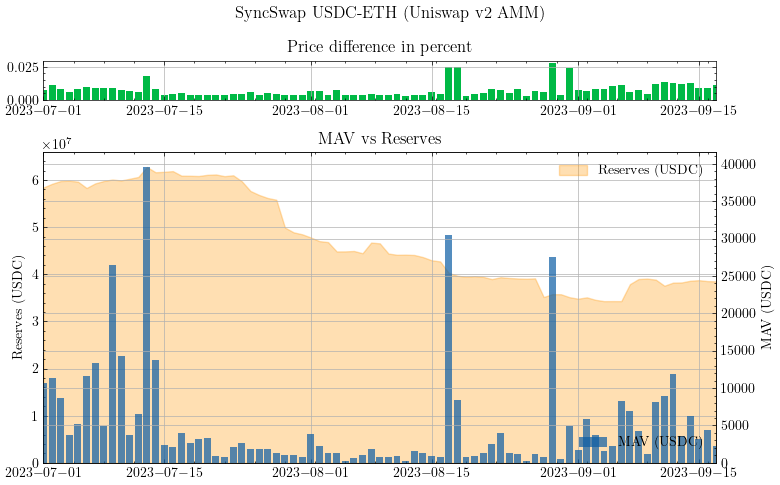

In [47]:
plt.style.use('https://raw.githubusercontent.com/garrettj403/SciencePlots/master/scienceplots/styles/science.mplstyle')

fig = plt.figure(figsize=(8,5))

gs1 = gridspec.GridSpec(5, 1)
ax1 = fig.add_subplot(gs1[0:1,0])
ax2 = fig.add_subplot(gs1[1:,0])
ax3 = ax2.twinx()

#fig.suptitle(file1)
fig.suptitle(f'{exchange_name} {token0}-{token1} (Uniswap v2 AMM)')

#ax1.plot(df_per_day['timestamp'], df_per_day['cum_MAV'], color ='C2')

#ax1.plot(df_per_day.index, df_per_day['price_diff']/df_per_day['spot_price'], 
ax1.bar(df_per_day.index, abs(df_per_day['price_diff']), 
        color = 'C1',
        label = r'Price Difference (\%)')

ax2.fill_between(df_per_day.index,0, df_per_day['reserve_total_0'], 
        color ='C2', alpha =0.3,
        label = f'Reserves ({token0})')

ax3.bar(df_per_day.index, df_per_day['MAV_0'],
        label = f'MAV ({token0})', alpha=0.7)
#.rolling(window).var()

ax2.set_ylim(0)
for a in [ax1, ax2]:
    a.set_xlim(min(df_per_day.index),max(df_per_day.index))

ax1.set_ylabel('%')

ax2.set_ylabel(f'Reserves ({token0})')
ax3.set_ylabel(f'MAV ({token0})')

ax1.set_title("Price difference in percent")
ax2.set_title("MAV vs Reserves")
#ax1.legend(loc=3)
ax3.legend(loc=4)
ax2.legend(loc=1)

ax1.grid()
ax2.grid()
ax3.grid()

gs1.tight_layout(fig)
plt.show()



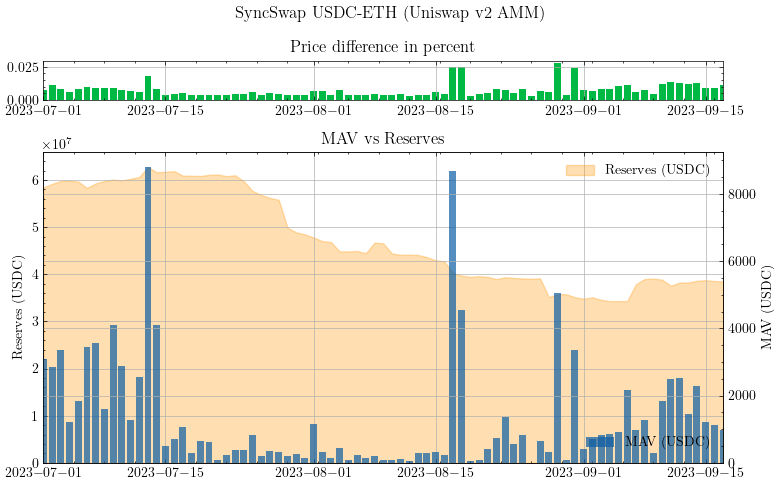

In [48]:
plt.style.use('https://raw.githubusercontent.com/garrettj403/SciencePlots/master/scienceplots/styles/science.mplstyle')

fig = plt.figure(figsize=(8,5))

gs1 = gridspec.GridSpec(5, 1)
ax1 = fig.add_subplot(gs1[0:1,0])
ax2 = fig.add_subplot(gs1[1:,0])
ax3 = ax2.twinx()

#fig.suptitle(file1)
fig.suptitle(f'{exchange_name} {token0}-{token1} (Uniswap v2 AMM)')

#ax1.plot(df_per_day['timestamp'], df_per_day['cum_MAV'], color ='C2')

#ax1.plot(df_per_day.index, df_per_day['price_diff']/df_per_day['spot_price'], 
ax1.bar(df_per_day.index, abs(df_per_day['price_diff']), 
        color = 'C1',
        label = r'Price Difference (\%)')

ax2.fill_between(df_per_day.index,0, df_per_day['reserve_total_0'], 
        color ='C2', alpha =0.3,
        label = f'Reserves ({token0})')

ax3.bar(df_per_day.index, df_per_day['max_MAV_0'],
        label = f'MAV ({token0})', alpha=0.7)
#.rolling(window).var()

ax2.set_ylim(0)
for a in [ax1, ax2]:
    a.set_xlim(min(df_per_day.index),max(df_per_day.index))

ax1.set_ylabel('%')

ax2.set_ylabel(f'Reserves ({token0})')
ax3.set_ylabel(f'MAV ({token0})')

ax1.set_title("Price difference in percent")
ax2.set_title("MAV vs Reserves")
#ax1.legend(loc=3)
ax3.legend(loc=4)
ax2.legend(loc=1)

ax1.grid()
ax2.grid()
ax3.grid()

gs1.tight_layout(fig)

plt.savefig(export_dir + "MAV_Reserves_{}_{}_{}".format(token0, token1, exchange_name))
plt.show()




In [49]:
print(gs1.get_geometry)

<bound method GridSpecBase.get_geometry of GridSpec(5, 1)>


<Axes: >

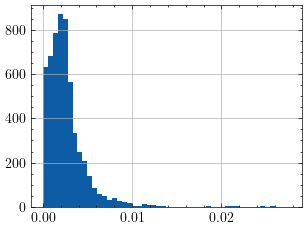

In [50]:
df_per_freq['price_diff'].hist(bins=50)


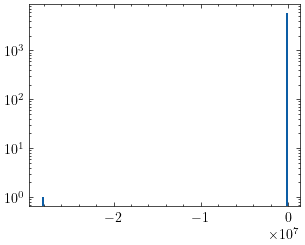

In [51]:


plt.figure()
plt.hist(df_per_freq['max_decay_min'], bins=100)
plt.yscale('log')
plt.show()

In [52]:
df_per_freq['max_decay_min'].describe(percentiles=[0, 0.005, 0.01, 0.05, 0.1])

count    5.711000e+03
mean    -4.949906e+03
std      3.737975e+05
min     -2.824831e+07
0%      -2.824831e+07
0.5%    -1.499000e+02
1%      -9.490000e+01
5%      -1.200000e+01
10%      0.000000e+00
50%      0.000000e+00
max      0.000000e+00
Name: max_decay_min, dtype: float64

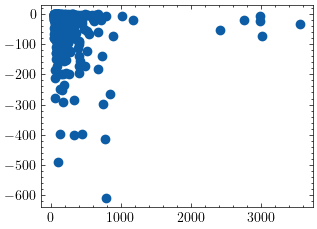

In [53]:
x = df_per_freq['max_MAV_0']
y = df_per_freq['max_decay_min']
xy = list(zip(x, y))

xy = [(m,d) for (m,d) in xy if m>0]
x = [m for (m,d) in xy]
y = [d for (m,d) in xy]

plt.figure()
plt.scatter(x,y)
plt.show()

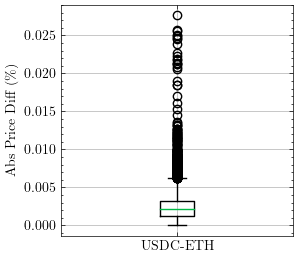

In [66]:
data = list(df_per_freq['price_diff'].dropna())

plt.figure(figsize=(3, 3))
# Create a boxplot
plt.boxplot(data)

# Adding labels
#plt.title('Distribution of abs price differnce')
plt.ylabel('Abs Price Diff (\%)')
plt.grid()
plt.xticks([1], ['USDC-ETH'])

# Show the plot
plt.show()

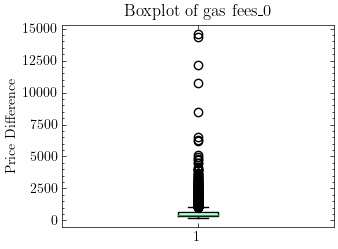

<Axes: >

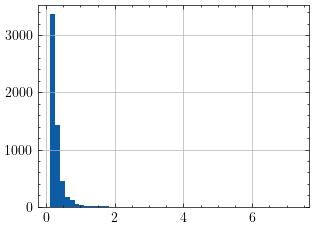

In [55]:
data = list(df_per_freq['fees_0'].dropna()*2000)

# Create a boxplot
plt.boxplot(data)

# Adding labels
plt.title('Boxplot of gas fees_0')
plt.ylabel('Price Difference')

# Show the plot
plt.show()

df_per_freq['fees_0'].hist(bins=50)

In [56]:
swap_df.describe



<bound method NDFrame.describe of                                                        transactionHash  \
timestamp                                                                
2023-07-01 00:00:03  0x905fb81e267ae12e8b7566d56a48311429e8b365d196...   
2023-07-01 00:00:04  0xa74d9fe78c79c22840ae9395c642c70d3cf3ecc5810f...   
2023-07-01 00:00:05  0x78d9d1f96153811c6a75ab2ffd974242aca1735e4b86...   
2023-07-01 00:00:05  0x8850ad1431c44a0da24bdc475489fa5abd6da064b158...   
2023-07-01 00:00:09  0x1cb5a570150bce08073994e8fc51dbd22caf6357d3d3...   
...                                                                ...   
2023-09-17 16:00:56  0x4755f4b1c56c288dca912200f99ed67b31ad048d0133...   
2023-09-17 16:00:59  0x3ce61c6f3bc1c254a2455695cccb30a1aaf8d7ff965d...   
2023-09-17 16:01:00  0x36c490938860d3e0972e793980e486fc7b74096964d6...   
2023-09-17 16:01:02  0xf9e211290d1e20ff88c7ab586d891c2624f4b7144374...   
2023-09-17 16:01:02  0xf7a6890e58f62e80778fd1a689f70920d6474dc2083b...   

   